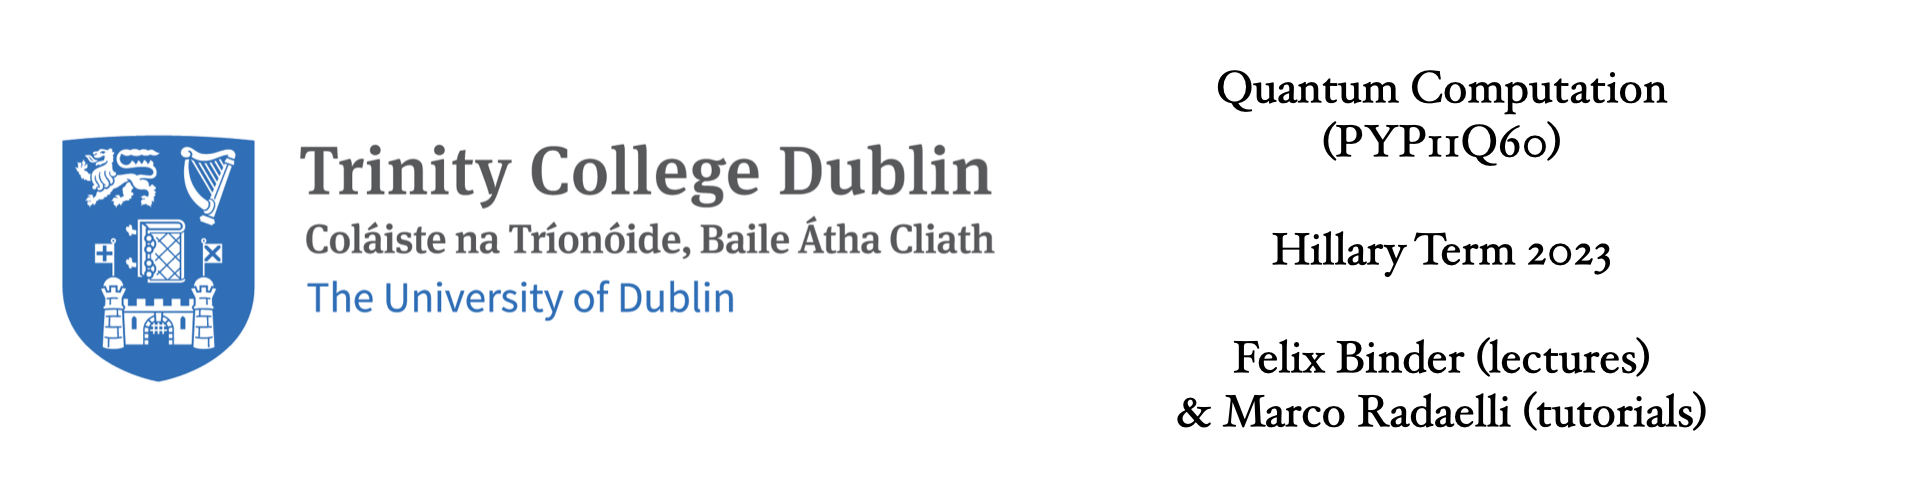

# Problem set 2

## General directions
<ul>
    <li>Some of the following exercises are numerical. They should be performed directly within this notebook. Other exercises are analytical, and should be solved on attached documents. You may submit handwritten solutions for the latter, but please make sure to write in a comprehensible manner.</li>
    <li>For the numerical tasks, please comment your code to explain what does what. Use meaningful names for variables and functions. </li>
    <li>We will need to be able to run the notebook. Make sure that there are no dependencies in the notebook based on files on your computer!</li>
    <li>Feel free to look online for help! Python documentation is <a href="https://docs.python.org/3/">here</a>, NumPy documentation <a href="https://numpy.org/doc/stable/">here</a>, and the Qiskit manual is <a href="https://qiskit.org/documentation/">here</a>. Some specific pages of Qiskit documentation or other useful sources are linked in the relevant questions.</li>
</ul>

$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$
$$\newcommand{\bra}[1]{\left\langle{#1}\right|}$$
$$\newcommand{\braket}[2]{\left\langle{#1}\middle|{#2}\right\rangle}$$

# 2.0 - Dependencies
Add all relevant dependencies for the problems to the following cell. Please avoid the <code>import</code> command outside this cell.

In [6]:
import numpy as np
from matplotlib import pyplot as plt
import random
import qiskit
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile, assemble
from qiskit import assemble 
from math import pi, sqrt
from qiskit.visualization import plot_histogram
from qiskit import *
from qiskit import Aer
sim = Aer.get_backend('aer_simulator')
from matplotlib import pyplot as plt
from qiskit import IBMQ
IBMQ.save_account('a73db6f39e60264f7ef6b7f3b29d7965500a599dfd1d66ad1852057f4415de08cc30f48dc8d1279c7b89a6c5b2fdee8e51082fdeb29dd27b498335f35b25f8cb', overwrite=True)


# 2.1 - Gate identities (6 pts. total)
When designing quantum circuits, it is often helpful to make use of gate identities. A way of proving such identities is to compare the unitary matrices; you can obtain the unitary matrix corresponding to a circuit in Qiskit using the procedure outlined <a href="https://medium.com/mdr-inc/checking-the-unitary-matrix-of-the-quantum-circuit-on-qiskit-5968c6019a45">here</a>.

## 2.1.a Basic gate identities (2 pts.)
<ol>
    <li>For each of the following questions, create the relevant Qiskit circuits and prove the equivalences by looking at the unitary matrices.
    <ul>
        <li> Express the <code>X</code>-gate in terms of <code>H</code> and <code>Z</code> gates</li>
        <li> Express the <code>CNOT(ij)</code> gate in terms of <code>H</code> gates and <code>CNOT(ji)</code> gates.</li>
        <li> Express the <code>SWAP</code> gate in terms of <code>CNOT</code> gates.</li>
     </ul></li>
    <li>Proof if the <code>CNOT</code> gate can be written in terms of <code>SWAP</code> gates.</li>
</ol>

### X-gate in terms of H and Z gates

In [7]:
#gate identity: X = HZH
circ = QuantumCircuit(1)
circ.h(0) #hadamard
circ.z(0) #z-gate
circ.h(0) #hadamard
#Simulator
simulator = Aer.get_backend('unitary_simulator')
job = execute(circ, simulator)
result = job.result()
print('Gate HZH')
print(result.get_unitary(circ, decimals=3))
print('\n')
#Matrix for X is printed with 'circ.x(0)'
circ2 = QuantumCircuit(1)
circ2.x(0)
#Simulator
simulator = Aer.get_backend('unitary_simulator')
job2 = execute(circ2, simulator)
result = job2.result()
print('X-gate')
print(result.get_unitary(circ2, decimals=3))




Gate HZH
Operator([[0.+0.j, 1.-0.j],
          [1.+0.j, 0.+0.j]],
         input_dims=(2,), output_dims=(2,))


X-gate
Operator([[0.+0.j, 1.+0.j],
          [1.+0.j, 0.+0.j]],
         input_dims=(2,), output_dims=(2,))


In [3]:
print('HZH')
circ.draw()

HZH


┌───┐┌───┐┌───┐
q: ┤ H ├┤ Z ├┤ H ├
   └───┘└───┘└───┘

In [4]:
print('x')
circ2.draw()

x


┌───┐
q: ┤ X ├
   └───┘

### CNOT(ij) gate in terms of H gates and CNOT (ji) gates.

In [9]:
#Hadamard 
backend = Aer.get_backend('unitary_simulator')
H_circ = QuantumCircuit(2) #2-qubit circuit
H_circ.h(0) #hadamard
job = execute(H_circ, backend)
result = job.result()
print(result.get_unitary(H_circ, decimals=3))
H_circ.draw()

Operator([[ 0.707+0.j,  0.707-0.j,  0.   +0.j,  0.   +0.j],
          [ 0.707+0.j, -0.707+0.j,  0.   +0.j,  0.   +0.j],
          [ 0.   +0.j,  0.   +0.j,  0.707+0.j,  0.707-0.j],
          [ 0.   +0.j,  0.   +0.j,  0.707+0.j, -0.707+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


┌───┐
q_0: ┤ H ├
     └───┘
q_1: ─────

In [11]:
from qiskit import Aer
sim = Aer.get_backend('aer_simulator')
#CNOT in terms of H gates 
simulator=Aer.get_backend('unitary_simulator')
circ_cnoth = QuantumCircuit(2)#2-qubit circuit
circ_cnoth.h(0) #Hadamard 
circ_cnoth.h(1) #Hadamard
circ_cnoth.cx(1,0) #CNOT 
circ_cnoth.h(0) #Hadamard
circ_cnoth.h(1) #Hadamard
#simulation
job=execute(circ_cnoth,simulator)
result=job.result()
#operator
print("CNOT in terms of H")
print(result.get_unitary(circ_cnoth, decimals=3))
#circuit
circ_cnoth.draw()
print('CNOT gate')
circ_cnoth.cx(0,1)

job = execute(circ_cnoth, simulator)
result = job.result()
print(result.get_unitary(circ_cnoth, decimals=3))


CNOT in terms of H
Operator([[ 1.-0.j, -0.+0.j,  0.+0.j,  0.+0.j],
          [-0.+0.j,  0.+0.j,  0.-0.j,  1.-0.j],
          [ 0.+0.j,  0.+0.j,  1.-0.j, -0.+0.j],
          [ 0.-0.j,  1.-0.j, -0.+0.j, -0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))
CNOT gate
Operator([[ 1.-0.j, -0.+0.j,  0.+0.j,  0.+0.j],
          [ 0.-0.j,  1.-0.j, -0.+0.j, -0.+0.j],
          [ 0.+0.j,  0.+0.j,  1.-0.j, -0.+0.j],
          [-0.+0.j,  0.+0.j,  0.-0.j,  1.-0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


In [12]:
#CNOT(ij) in terms of CNOT(ji) 
circ_ij_ji = QuantumCircuit(2) #2-qubits (CNOT is a two qubit operation)
circ_ij_ji.cx(0,1) #CNOT (ji)
#simulation
job = execute(circ_ij_ji, backend)
result = job.result()
print(result.get_unitary(circ_ij_ji, decimals=3)) #operator
circ.draw() #circuit

Operator([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


┌───┐┌───┐┌───┐
q: ┤ H ├┤ Z ├┤ H ├
   └───┘└───┘└───┘

### SWAP gates in terms of CNOT gates and CNOT in terms of SWAP gates.

#### SWAP in terms of CNOT

In [13]:
print(' SWAP gate is decomposed of three CNOT gates ')
circ_swapcnot = QuantumCircuit(2) #2-qubits (SWAP is a two qubit operation)
circ_swapcnot.swap(0,1)
#CNOT GATES
circ_swapcnot.cx(1,0)
circ_swapcnot.cx(0,1)
circ_swapcnot.cx(1,0)
#Simulatio
simulator=Aer.get_backend('unitary_simulator')

job = execute(circ_swapcnot, simulator)
result = job.result()
print(result.get_unitary(circ_swapcnot, decimals=3)) #operator
circ_swapcnot.draw()#Circuit

print("SWAP")
circ_swapcnot.swap(0,1)
job = execute(circ_swapcnot, simulator)
result = job.result()
print(result.get_unitary(circ_swapcnot, decimals=3))

circ_swapcnot.draw()

 SWAP gate is decomposed of three CNOT gates 
Operator([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))
SWAP
Operator([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


┌───┐     ┌───┐   
q_0: ─X─┤ X ├──■──┤ X ├─X─
      │ └─┬─┘┌─┴─┐└─┬─┘ │ 
q_1: ─X───■──┤ X ├──■───X─
             └───┘

#### Can CNOT be written in terms of SWAP gates?


The way we can do a SWAP is by implementing CNOT Gates 
SWAP gates perform the operation regardless of the input, however, CNOT requires if the qubit is 1 or 0 before acting on the other one. 
CNOT gate is known as control gate, whenever the control qubit is in |1> the target qubit changes its value from |0> to |1>. The SWAP gate interchanges the input states. 

In [14]:
c_swap = QuantumCircuit(2)
# swap from q0 to q1
c_swap.cx(1,0) # copies q0 to q1
c_swap.cx(0,1) # uses the state on q1 to rotate the state of q0 
job = execute(c_swap, backend)
result = job.result()
print(result.get_unitary(c_swap, decimals=3)) #operator
c_swap.draw()#Circuit


Operator([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


┌───┐     
q_0: ┤ X ├──■──
     └─┬─┘┌─┴─┐
q_1: ──■──┤ X ├
          └───┘

We should keep in mind that in this process, the first gate would have no effect on the initial state of the other and the final gate of one have no effect on the final state of the other. 

## 2.1.b Universality of quantum gates (4 pts.)
The <it>size</it>  of a quantum circuit refers to the the number of basic quantum gates it contains (i.e., from a given gate set). It is important to note that, in general, the size of a quantum circuit is dependent on the specific choice of the basis gates.

<ol>
  <li>Let $\mathcal{U}$ be a unitary operator acting on a single qubit. Show that the operator $\mathcal{U}$ can be realized using two qubits (and no further ancillas) by a circuit of constant size, over the basis given by the controlled phase-operator <code>CPHASE</code>($\phi$), where $\phi$ can take any real value, and the Hadamard gate <code>H</code>. The <code>CPHASE</code> gate is the controlled version of the <code>PHASE</code> gate, which on its turn has the form:
$$PHASE = \begin{bmatrix}1 & 0 \\ 0 & e^{i\phi}\end{bmatrix}$$ on the computational basis $\{\ket{0}, \ket{1}\}$. 
  </li>
  <li>Let $c\mathcal{U}$ be the controlled version of a generic one-qubit operator $\mathcal{U}$. Prove that $c\mathcal{U}$ can be implemented by a constant size circuit (with no ancillas) with two qubits, over the basis of single-qubit gates and the <code>CNOT</code> gate.
  <li>Let the unitary gate $\mathcal{V}$, acting on $n$ qubits, satisfy $\mathcal{V} \ket{0}^{\otimes n}=\ket{0}^{\otimes n}$, where $\ket{0}^{\otimes n} = \ket{0}\otimes \ket{0} \otimes \ldots \otimes \ket{0}$. Construct a circuit of size $6n+1$ realizing the controlled version $c\mathcal{V}$ of $\mathcal{V}$ on the basis given by $\mathcal{V}$ itself and by the <code>TOFFOLI</code> gate. You can use ancillas, but you should apply $\mathcal{V}$ only once. </li>
</ol>

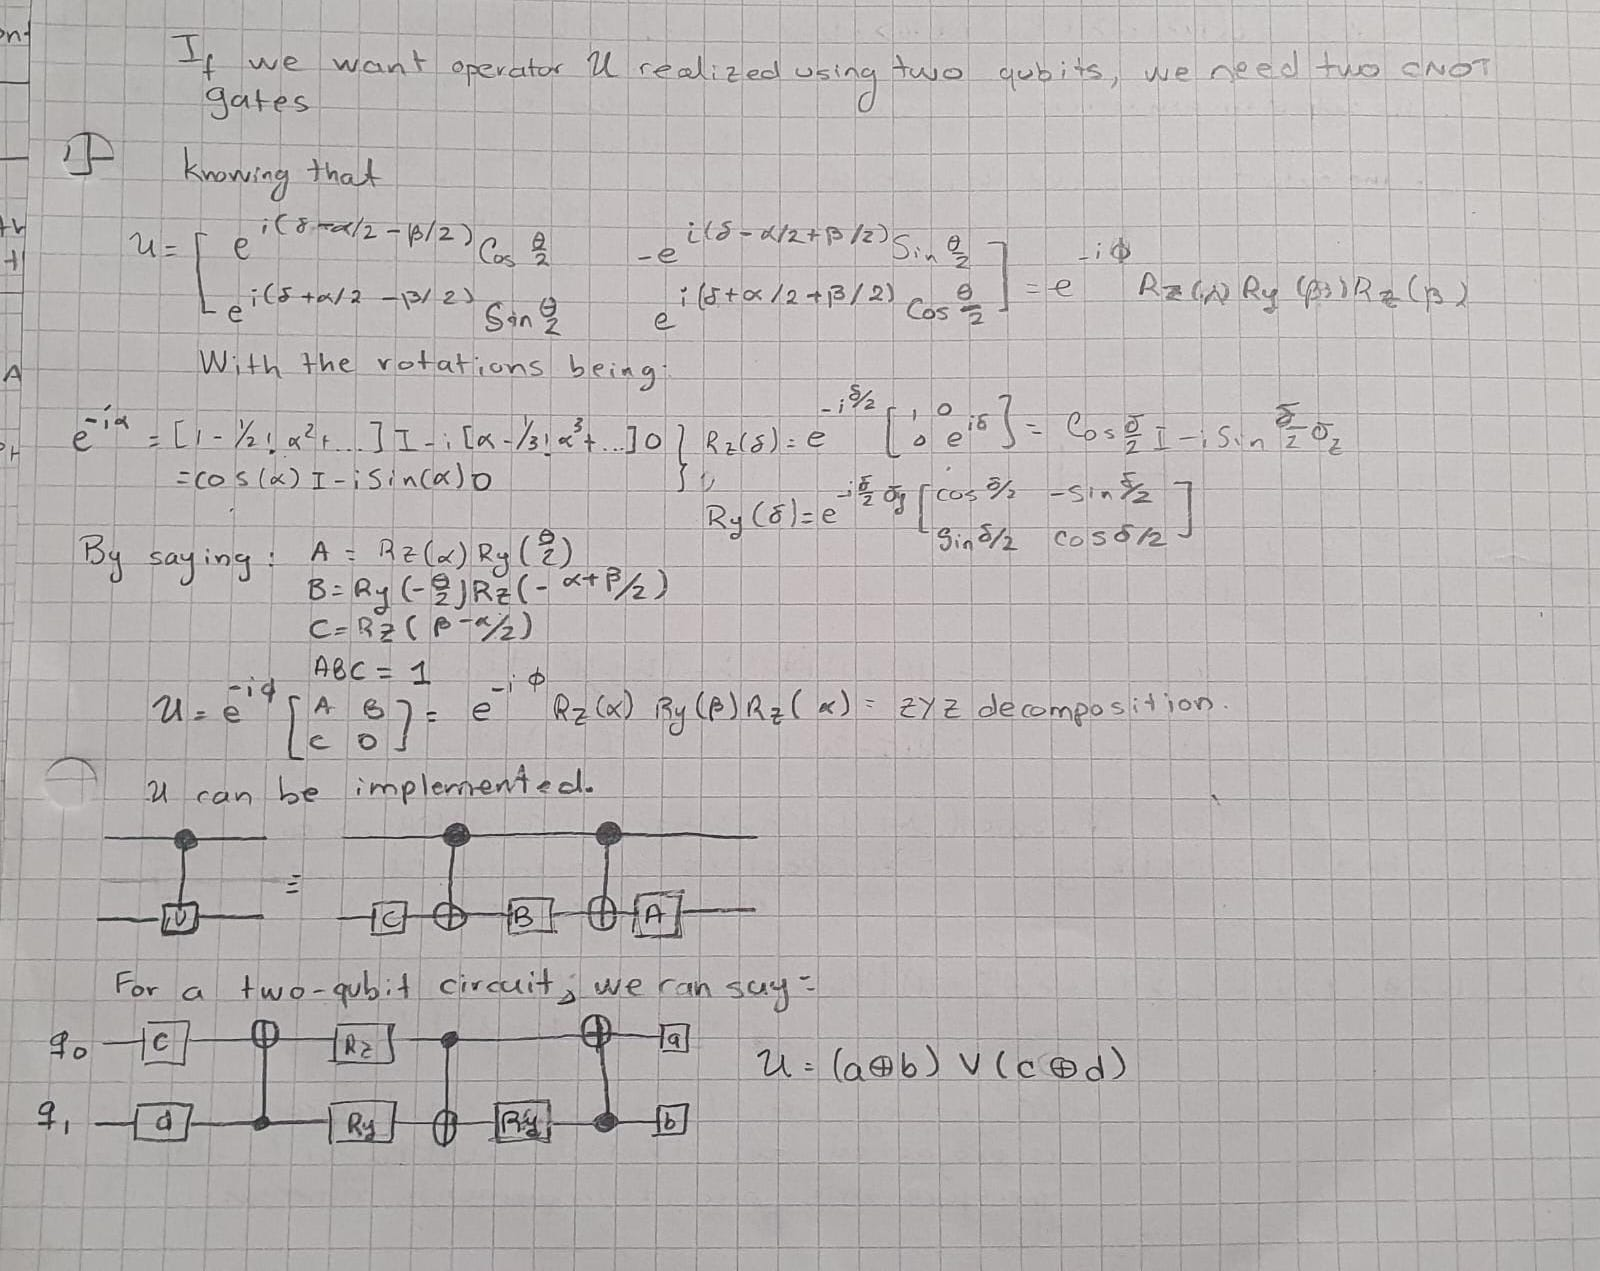

# 2.2 - Quantum Random Walks (10 pts. total + 2 optional)
Quantum random walks can be extremely powerful for modeling various different physical phenomena. In this problem, you will explore so-called <i>discrete-time</i> quantum walks (DTQWs). 

A DTQW is defined on two Hilbert spaces $\mathcal{H}_c \otimes \mathcal{H}_p$. The first Hilbert space represents the degree of freedom of a <i>quantum coin</i>, while the second contains the <i>position</i> of the walker. Consider in particular a walk on a ring of 16 nodes. In this case, $\mathcal{H}_c$ has dimension 2 (two possible directions at each step), while $\mathcal{H}_p$ has dimension 4 (bits necessary to represent numbers from 0 to 15). 

At each step, the walker tosses the coin in order to decide in which direction to go. To do so, they apply a unitary operator $\mathcal{C}$, acting only on the first degree of freedom. Then, they apply a conditional shift operator $\mathcal{S}$, which updates the position according to the result of the coin toss. If $\ket{\uparrow}$ and $\ket{\downarrow}$ are the possible states of the coin, then the conditional shift operator has the form:
$$\mathcal{S} = \ket{\uparrow}\bra{\uparrow} \otimes \mathcal{R} + \ket{\downarrow}\bra{\downarrow} \otimes \mathcal{L}$$
where $\mathcal{L}$ and $\mathcal{R}$ are, respectively, the operator shifting the position to the left, and the operator shifting the position to the right.

The purpose of this exercise is to build a DTQW in Qiskit.

### 2.2.a Incrementer circuit (2 pts.)
The first step is to build the $\mathcal{L}$ and $\mathcal{R}$ operators. Here, the position is encoded in $\mathcal{H}_p$, with basis states $\ket{0},\ldots,\ket{15}$. Therefore, the position can be represented using 4 qubits. The $\mathcal{R}$ operator has to map the basis state $\ket{i}$ onto the basis state $\ket{i+1}$. Conversely, $\mathcal{L}\ket{i} = \ket{i-1}$. 

Since the walk is taking place on a ring, you can impose periodic boundary conditions:
$$\mathcal{L}\ket{0} = \ket{15} \,\,\,\,\, ; \,\,\,\,\, \mathcal{R}\ket{15} = \ket{0}.$$

The $\mathcal{R}$ circuit can be implemented using the circuit

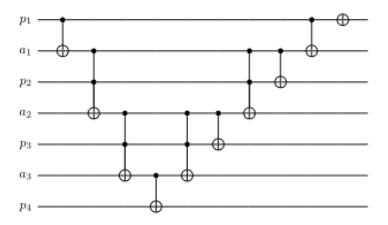

Here, the position is encoded in the qubits labeled $p_1,\ldots,p_4$, while the other qubits, labeled with $a$, are ancillary. 

Create the $\mathcal{R}$ circuit in Qiskit. Plot the diagram of the circuit, and print its $\LaTeX$ source code.

Once you have created your $\mathcal{R}$ operator, turn it into a user-defined gate (see <a href="https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.to_gate.html">here</a> for a Qiskit function for his purpose).

#### R circuit 

In [15]:
#Building the circuit for R
circR = QuantumCircuit(7) #consiering the qubits (4) and the ancillas (3) we have 7 lines
circR.cx(0,1) #CNOT  
circR.toffoli(1,2,3) #Toffoli
circR.toffoli(3,4,5) #Toffoli
circR.cx(5,6) #CNOT
circR.toffoli(3,4,5) #Toffoli
circR.cx(3,4) #CNOT
circR.toffoli(1,2,3) #Toffoli
circR.cx(1,2) #CNOT
circR.cx(0,1) #CNOT
circR.x(0) #XGate
#Diagram
circR.draw()

┌───┐
q_0: ──■───────────────────────────────────────■──┤ X ├
     ┌─┴─┐                                   ┌─┴─┐└───┘
q_1: ┤ X ├──■────────────────────────■────■──┤ X ├─────
     └───┘  │                        │  ┌─┴─┐└───┘     
q_2: ───────■────────────────────────■──┤ X ├──────────
          ┌─┴─┐                    ┌─┴─┐└───┘          
q_3: ─────┤ X ├──■─────────■────■──┤ X ├───────────────
          └───┘  │         │  ┌─┴─┐└───┘               
q_4: ────────────■─────────■──┤ X ├────────────────────
               ┌─┴─┐     ┌─┴─┐└───┘                    
q_5: ──────────┤ X ├──■──┤ X ├─────────────────────────
               └───┘┌─┴─┐└───┘                         
q_6: ───────────────┤ X ├──────────────────────────────
                    └───┘

#### User-defined gate 

In [16]:
#Turn it into a user-defined gate using suggested documentation found in: 
#https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.to_gate.html | qiskit.circuit.QuantumCircuit.to_gate
R = QuantumCircuit.to_gate(circR, label=None)
Rc = circR.to_gate(label='R').control(1)



## 2.2.b Decrementer circuit (3 pts.)
From the incrementer circuit, now turn to the decrementer circuit $\mathcal{L}$, which has a very similar structure to $\mathcal{R}$. 

Create the $\mathcal{L}$ circuit, plot its diagram and turn it into a user-defined gate.

#### L circuit 


In [17]:
#Building the circuit for L
circL = QuantumCircuit(7) #same number of qubits and ancillas
#The logic behind this code is that we take the code wrote in the R circuit and just inverse it starting from the XGate
circL.x(0)
circL.cx(0,1)
circL.cx(1,2)
circL.toffoli(1, 2, 3)
circL.cx(3,4)
circL.toffoli(3, 4, 5)
circL.cx(5,6)
circL.toffoli(3, 4, 5)
circL.toffoli(1, 2, 3)
circL.cx(0,1)
#Diagram
circL.draw()

┌───┐                                             
q_0: ┤ X ├──■───────────────────────────────────────■──
     └───┘┌─┴─┐                                   ┌─┴─┐
q_1: ─────┤ X ├──■────■────────────────────────■──┤ X ├
          └───┘┌─┴─┐  │                        │  └───┘
q_2: ──────────┤ X ├──■────────────────────────■───────
               └───┘┌─┴─┐                    ┌─┴─┐     
q_3: ───────────────┤ X ├──■────■─────────■──┤ X ├─────
                    └───┘┌─┴─┐  │         │  └───┘     
q_4: ────────────────────┤ X ├──■─────────■────────────
                         └───┘┌─┴─┐     ┌─┴─┐          
q_5: ─────────────────────────┤ X ├──■──┤ X ├──────────
                              └───┘┌─┴─┐└───┘          
q_6: ──────────────────────────────┤ X ├───────────────
                                   └───┘

#### User-defined gate 


In [18]:
#Turn it into a user-defined gate using suggested documentation found in: 
#https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.to_gate.html 
L = circL.to_gate()
Lc = circL.to_gate(label='L').control(1)



## 2.2.c Conditional shift operator (1 pt.)
Using the previously defined $\mathcal{L}$ and $\mathcal{R}$ operators, you will now need to create the conditional shift operator $\mathcal{S}$. This requires conditioning $\mathcal{R}$ and $\mathcal{L}$ on another qubit, which will represent the coin. 

Create the $\mathcal{S}$ circuit using the previously defined $\mathcal{R}$ and $\mathcal{L}$. To learn how to create the controlled version of a unitary gate, you can have a look <a href="https://qiskit.org/documentation/stubs/qiskit.circuit.ControlledGate.html">here</a>.

#### Conditional shift operator  S circuit 
 

In [19]:
#Append the controlled versions of R and L  by following the instructions of qiskit documentation: qiskit.circuit.QuantumCircuit.append
circS = QuantumCircuit(8) 
circS.append(Rc,[0,1,2,3,4,5,6,7])
circS.x(0)
circS.append(Lc,[0,1,2,3,4,5,6,7])
circS.draw()



┌───┐      
q_0: ──■───┤ X ├──■───
     ┌─┴──┐└───┘┌─┴──┐
q_1: ┤0   ├─────┤0   ├
     │    │     │    │
q_2: ┤1   ├─────┤1   ├
     │    │     │    │
q_3: ┤2   ├─────┤2   ├
     │    │     │    │
q_4: ┤3 R ├─────┤3 L ├
     │    │     │    │
q_5: ┤4   ├─────┤4   ├
     │    │     │    │
q_6: ┤5   ├─────┤5   ├
     │    │     │    │
q_7: ┤6   ├─────┤6   ├
     └────┘     └────┘

In [21]:
#Create a user-defined gate so we can use it in 2.2.d 
S = QuantumCircuit.to_gate(circS, label='S')

## 2.2.d Step operator (1 pt.)
Combining the conditional shift operator $\mathcal{S}$ and the coin operator $\mathcal{C}$, you can now create the whole step operator. 

As coin operator, in principle one could choose any operator in $SU(2)$. However, it is a very common choice to use the Hadamard operator $H$ for this purpose.

Using the Hadamard gate <code>H</code> as the coin operator, create the step circuit, and turn it into a user-defined gate. 

In [22]:
#Whole step operator using a Hadamard as coin operator
circStep = QuantumCircuit(8)
circStep.h(0) #Hadamard
circStep.append(S,[0,1,2,3,4,5,6,7]) #add the S-gate created in 2.2.c and attach it together with the hadamard
#Diagram
circStep.draw()

┌───┐┌────┐
q_0: ┤ H ├┤0   ├
     └───┘│    │
q_1: ─────┤1   ├
          │    │
q_2: ─────┤2   ├
          │    │
q_3: ─────┤3   ├
          │  S │
q_4: ─────┤4   ├
          │    │
q_5: ─────┤5   ├
          │    │
q_6: ─────┤6   ├
          │    │
q_7: ─────┤7   ├
          └────┘

In [23]:
#Create a user-defined gate so we can use it in 2.2.e 
step = QuantumCircuit.to_gate(circStep, label='step')

## 2.2.e Perform a walk (1 pt.)
A walk is composed of a succession of many steps. To create an $n$-step walk, you have to apply the step operator to an initial state $n$ times. Let the initial state be
$$\ket{\psi_0} = \ket{\uparrow} \otimes \ket{3}$$
Create a circuit able to prepare the initial state, then to perform 5 steps of a quantum walk. At the end of the walk, measure all the qubits encoding the position of the walker, and show a histogram of the outcomes.

<b>Note.</b> The outcomes will be, by Qiskit's default behaviour, expressed in binary form. Please translate them into decimal form in order to obtain plot of the position probability distribution after 5 steps.

#### Circuit to prepare the initial state and perform 5 steps of a quantum walk


In [24]:
#Creating circuit for 8 qubits and 4 classical bits
circW=QuantumCircuit(8,4)
#||↑⟩⊗||3⟩ 
circW.x(1) 
circW.x(3)
#iteration for the steps 
for i in range(5): #5 steps of a quantum walk thus our range is 5
    circW.append(step,[0,1,2,3,4,5,6,7]) #'step' is the user-defined gate in 'Step operator'
                                        
circW.measure(1,0) #measurement in qubit 1 and classical bit 0
circW.measure(3,1) #qubit 3 and classical bit 1
circW.measure(5,2) #qubit 5 and classical bit 2
circW.measure(7,3) #qubit 7 and classical bit 3
    
circW.draw()

┌───────┐┌───────┐┌───────┐┌───────┐┌───────┐            
q_0: ─────┤0      ├┤0      ├┤0      ├┤0      ├┤0      ├────────────
     ┌───┐│       ││       ││       ││       ││       │┌─┐         
q_1: ┤ X ├┤1      ├┤1      ├┤1      ├┤1      ├┤1      ├┤M├─────────
     └───┘│       ││       ││       ││       ││       │└╥┘         
q_2: ─────┤2      ├┤2      ├┤2      ├┤2      ├┤2      ├─╫──────────
     ┌───┐│       ││       ││       ││       ││       │ ║ ┌─┐      
q_3: ┤ X ├┤3      ├┤3      ├┤3      ├┤3      ├┤3      ├─╫─┤M├──────
     └───┘│  step ││  step ││  step ││  step ││  step │ ║ └╥┘      
q_4: ─────┤4      ├┤4      ├┤4      ├┤4      ├┤4      ├─╫──╫───────
          │       ││       ││       ││       ││       │ ║  ║ ┌─┐   
q_5: ─────┤5      ├┤5      ├┤5      ├┤5      ├┤5      ├─╫──╫─┤M├───
          │       ││       ││       ││       ││       │ ║  ║ └╥┘   
q_6: ─────┤6      ├┤6      ├┤6      ├┤6      ├┤6      ├─╫──╫──╫────
          │       ││       ││       ││       ││       │ ║  ║  ║ ┌─┐
q_7: ─────┤7      ├┤7      ├┤7      ├┤7      ├┤7      ├─╫──╫──╫─┤M├
          └───────┘└───────┘└───────┘└───────┘└───────┘ ║  ║  ║ └╥┘
c: 4/═══════════════════════════════════════════════════╩══╩══╩══╩═
                                                        0  1  2  3

#### Histogram of outcomes 

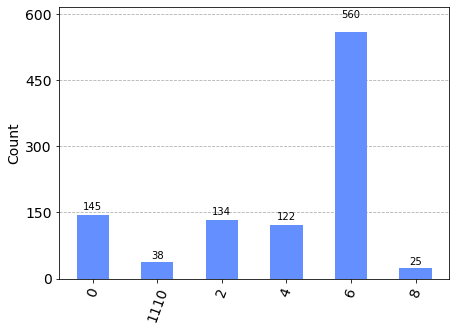

In [28]:
#Once we have created the circuit we use AerSimulator to mimic the execution of an actual device.
simulator = Aer.get_backend('aer_simulator') 
#In order to create an histogram we need a number of shots
shots = 500
#Because we have ||𝜓0⟩=||↑⟩⊗||3⟩ we gonna use the statevector from qiskit: sim_statevector = Aer.get_backend('aer_simulator_statevector')
sim_statevector = Aer.get_backend('statevector_simulator')
transp = transpile(circW, sim_statevector) #Transpile for simulator "circ = transpile(circ, simulator)"  from qiskit documentation 
assem = assemble(transp) #Assemble a list of circuits into a Qobj
outcome = simulator.run(assem).result()
counts = outcome.get_counts()#Result.get_counts(experiment)- Get the histogram data of an experiment.Qiskit documentation
#Translate binary to decimal:
counts['0'] = counts['0000']
del counts['0000']
counts['2'] = counts['0010']
del counts['0010']
counts['4'] = counts['0100']
del counts['0100']
counts['6'] = counts['0110']
del counts['0110']
counts['8'] = counts['1000']
del counts['1000']
# P L O T     H I S T O G R A M
plot_histogram(counts)



## 2.2.f Transpiling (2 pts.)
<b>Note.</b> You may want to attempt <a href="#transpiling_exercise">exercise 2.4</a> below before proceeding with this question.

In practice, not all gates are available on a physical quantum computer, depending on its specific technological implementation. However, being able to execute a complete set of quantum gates allows one to perform any quantum calculation. For example, the set composed of the <code>CNOT</code>, the <code>H</code>, and the <code>RZ</code> gate is complete.

Qiskit gives the possibility to rewrite a circuit in terms of a given complete set of gates (Have a look <a href="https://qiskit.org/documentation/stubs/qiskit.compiler.transpile.html">here</a> to learn how to proceed). In Qiskit's jargon, this procedure is called <b>transpiling</b>.

Transpile the step operator on the gates set composed by <code>H</code>, <code>CNOT</code> and <code>RZ</code>, and plot the outcoming circuit.

In [29]:
transpiling = transpile(circW, backend=None, basis_gates=['h','cx','r'], inst_map=None, coupling_map=None, 
                backend_properties=None, initial_layout=None, layout_method=None, routing_method=None, 
                translation_method=None, scheduling_method=None, instruction_durations=None, dt=None, 
                approximation_degree=None, timing_constraints=None, seed_transpiler=None, 
                optimization_level=None, callback=None, output_name=None, 
                unitary_synthesis_method='default', unitary_synthesis_plugin_config=None, target=None)
transpiling.draw()


global phase: π/4
           ┌───┐                                                     »
q_0: ──────┤ H ├──────────────────────────────────────────────────■──»
         ┌─┴───┴──┐                                               │  »
q_1: ────┤ R(π,0) ├──────────■────────────────────────────────────┼──»
         └─┬───┬──┘        ┌─┴─┐      ┌────────────┐┌──────────┐┌─┴─┐»
q_2: ──────┤ H ├───────────┤ X ├──────┤ R(-π,5π/8) ├┤ R(π,π/2) ├┤ X ├»
         ┌─┴───┴──┐        └───┘      └────────────┘└──────────┘└───┘»
q_3: ────┤ R(π,0) ├──────────────────────────────────────────────────»
     ┌───┴────────┴──┐┌──────────────┐                               »
q_4: ┤ R(-π,-2.8198) ├┤ R(π,-2.0344) ├───────────────────────────────»
     └───────────────┘└──────────────┘                               »
q_5: ────────────────────────────────────────────────────────────────»
     ┌───────────────┐┌──────────────┐                               »
q_6: ┤ R(-π,-2.8198) ├┤ R(π,-2.0344) ├───────────────────────────────»
     └─────┬───┬─────┘└──────────────┘                               »
q_7: ──────┤ H ├─────────────────────────────────────────────────────»
           └───┘                                                     »
c: 4/════════════════════════════════════════════════════════════════»
                                                                     »
«                                                                       »
«q_0: ───────────────────────────────────────────────────────────────■──»
«                                      ┌─────────────┐┌───────────┐  │  »
«q_1: ──────────────────────────────■──┤ R(-π,-5π/8) ├┤ R(π,-π/2) ├──┼──»
«     ┌─────────────┐┌───────────┐┌─┴─┐└┬────────────┤└┬──────────┤┌─┴─┐»
«q_2: ┤ R(-π,-5π/8) ├┤ R(π,-π/2) ├┤ X ├─┤ R(-π,5π/8) ├─┤ R(π,π/2) ├┤ X ├»
«     └─────────────┘└───────────┘└───┘ └────────────┘ └──────────┘└───┘»
«q_3: ──────────────────────────────────────────────────────────────────»
«                                                                       »
«q_4: ──────────────────────────────────────────────────────────────────»
«                                                                       »
«q_5: ──────────────────────────────────────────────────────────────────»
«                                                                       »
«q_6: ──────────────────────────────────────────────────────────────────»
«                                                                       »
«q_7: ──────────────────────────────────────────────────────────────────»
«                                                                       »
«c: 4/══════════════════════════════════════════════════════════════════»
«                                                                       »
«                      ┌─────────────┐┌───────────┐     ┌───────────────┐»
«q_0: ────────■────────┤ R(-π,-5π/8) ├┤ R(π,-π/2) ├──■──┤ R(-π,-2.8198) ├»
«           ┌─┴─┐      └┬────────────┤└┬──────────┤┌─┴─┐└───────────────┘»
«q_1: ──────┤ X ├───────┤ R(-π,5π/8) ├─┤ R(π,π/2) ├┤ X ├─────────────────»
«     ┌─────┴───┴─────┐ ├───────────┬┘ └──────────┘└───┘                 »
«q_2: ┤ R(-π/2,-3π/4) ├─┤ R(π,-π/8) ├────────────────────────────────────»
«     └───────────────┘ └───────────┘                                    »
«q_3: ───────────────────────────────────────────────────────────────────»
«                                                                        »
«q_4: ───────────────────────────────────────────────────────────────────»
«                                                                        »
«q_5: ───────────────────────────────────────────────────────────────────»
«                                                                        »
«q_6: ───────────────────────────────────────────────────────────────────»
«                                                                        »
«q_7: ───────────────────────────────────────────────────────────────────»
«                          

## 2.2.g Comparison with a classical walk (2 pts. - optional)
The DTQW is the quantum counterpart of the classical discrete-time random walk. If you are not familiar with classical random walks, this <a href="https://en.wikipedia.org/wiki/Random_walk#One-dimensional_random_walk">Wikipedia page</a> is a good starting place to find out more.

Write a Python script which plots the probability distribution after 5 steps of a classical walk on a 16-ring, with a fair coin, and plot it in the same graph as the DTQW outcomes from above. Comment the similarity and differences.

<b>Note.</b> There are (at least) two possible ways of simulating classical walks. You can use a MonteCarlo approach (many repetitions, based on a random number generator), or a more mathematical perspective employing building the transition matrices for a Markov process. Both approaches are acceptable, but keep in mind that MonteCarlo simulations are affected by simulation errors.

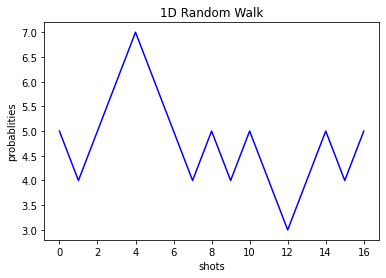

In [30]:
#to create a classical 1D random walk we need to:
#1. Initialize at position y
#2. Randomly move up or down (add or substract  1 from y) 
#3. Keep track of all positions and values.
#using numpy and import random a classical random walk can be implemented natively in Python.

#definition and initialize positions at 0
def classical_rw(n):
    x = 0
    y= 5
    #generate points
    points = np.arange(n + 1)
    position = [y]
    up_down = ["UP", "DOWN"] #establish the directions 'up' or 'down' which are the adding and substracting
    for i in range(1, n + 1): #Definition of the iteration 
        #randomly add or substract 1 
        s = random.choice(up_down)
        #if / else statements for adding and substraction
        if s == "UP": #if it goes up, then add 1
            y += 1
        elif s == "DOWN": #otherwise, if it goes down, substract 1
            y -= 1
#We want to keep track of all possible outcomes so then we can plot them.
        position.append(y)
    return points, position
#plot
time_data, pos_data = classical_rw(16)
plt.plot(time_data, pos_data, 'b')
plt.title("1D Random Walk")
plt.ylabel('probablities')
plt.xlabel('shots')
plt.show()




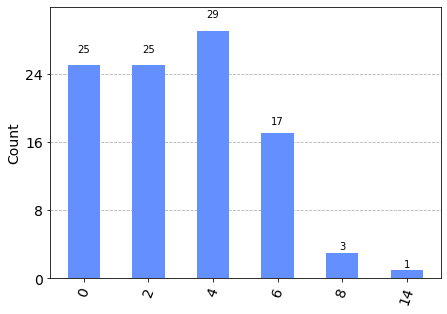

In [31]:
def classical_rw(n):
    x = 0
    y = 3
    #generate point
    points = np.arange(n + 1)
    position = [y]
    up_down = ["UP", "DOWN"]
    for i in range(1, n + 1):
        s = random.choice(up_down)
        if s == "UP":
            y += 1
        elif s == "DOWN":
            y -= 1
        position.append(y)
        final_step = y
    return  final_step
#Histogram 
n = 100
position = np.zeros(n)
for i in range(n):
    position[i] = classical_rw(5)
#Plot
unique, counts = np.unique(position, return_counts=True)
plot = dict(zip(unique.astype(int), counts))
plot[14] = plot[int(-2)]
del plot[int(-2)]
plot_histogram([plot])

The main difference between a classical and a quantum random walk is the probability distribution. The classical random walk will simulate the movement of a point-like element and the quantum random walk will simulate the movement of a wave through space.
In this case the classical and quantum walks are similar because we have similar points but the distributions are different.

# 2.3 - Bernstein-Vazirani Algorithm (2 pts.)
Let $a$ be an unknown integer number, $0\leq a \leq 2^n$ and let it be represented in binary form as $a=a_0 a_1 a_2 \ldots a_{n-1}$. Consider the function:
$$
    f(x) = a\cdot x = a_0 x_0 \oplus \ldots \oplus a_{n-1}x_{n-1}. 
$$
Suppose that we are able to apply the function on any $n$-bits input through a suitable black-box oracle $U_f$, working in this way:

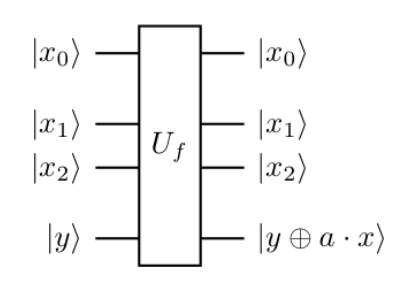

We can determine the value of $a$ by using the Bernstein-Vazirani Algorithm, employing a circuit with the following structure:

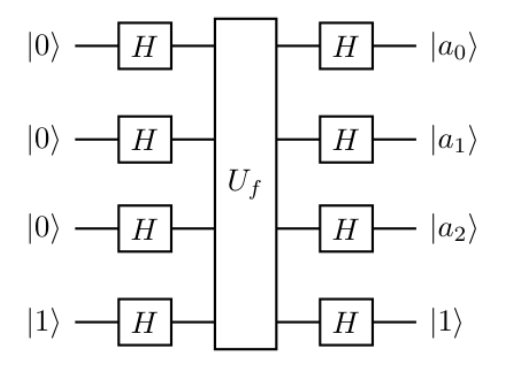

In the next cell, you are given the quantum gate $U_f$, but you do not know the value of $a$. Create a Bernstein-Vazirani circuit, plot it, and by performing suitable measurements retrieve the value of $a$.

In [32]:
oracle = qiskit.QuantumCircuit(4)
oracle.cx(0,3)
oracle.cx(2,3)
oracle.draw()

q_0: ──■───────
       │       
q_1: ──┼───────
       │       
q_2: ──┼────■──
     ┌─┴─┐┌─┴─┐
q_3: ┤ X ├┤ X ├
     └───┘└───┘

#### Bernstein-Vazirani circuit

In [33]:
#Bernstein-Vazirani Algorithm from qiskit

#4 qubits and a classical for measurement
circ = QuantumCircuit(4,4)

#gates
circ.h(0)
circ.h(1)
circ.h(2)
circ.h(3)
circ.z(3)
circ.barrier()
circ.cx(0,3)
circ.i(2)
circ.cx(1,3)
circ.barrier()
circ.h(0)
circ.h(1)
circ.h(2)

#measurement in qubits 0, 1 and 2. 
for n in range(4):
    circ.measure(n,n)

circ.draw()

┌───┐      ░                 ░ ┌───┐┌─┐      
q_0: ┤ H ├──────░───■─────────────░─┤ H ├┤M├──────
     ├───┤      ░   │             ░ ├───┤└╥┘┌─┐   
q_1: ┤ H ├──────░───┼─────────■───░─┤ H ├─╫─┤M├───
     ├───┤      ░   │  ┌───┐  │   ░ ├───┤ ║ └╥┘┌─┐
q_2: ┤ H ├──────░───┼──┤ I ├──┼───░─┤ H ├─╫──╫─┤M├
     ├───┤┌───┐ ░ ┌─┴─┐└───┘┌─┴─┐ ░ └┬─┬┘ ║  ║ └╥┘
q_3: ┤ H ├┤ Z ├─░─┤ X ├─────┤ X ├─░──┤M├──╫──╫──╫─
     └───┘└───┘ ░ └───┘     └───┘ ░  └╥┘  ║  ║  ║ 
c: 4/═════════════════════════════════╩═══╩══╩══╩═
                                      3   0  1  2

#### Plot

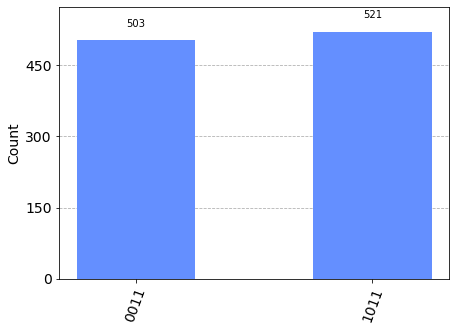

In [35]:
# use local simulator: aer_simnulator from qiskit library

aer_sim = Aer.get_backend('aer_simulator')
counts = 1024
assem = assemble(circ) 
outcome = aer_sim.run(assem).result()
answer = outcome.get_counts()
plot_histogram(answer)

Following the example of the given oracle, write a Python script that takes as input a value of $a$ between 0 and 7, and outputs the Qiskit circuit for the relevant oracle, plotting it.

In [36]:
from qiskit import QuantumCircuit
n = 3
s = '011'
circ = QuantumCircuit(n+1, n) #n+1 qubits and n classical bits 
circ.h(n)
circ.z(n)
for i in range(n):
    circ.h(i)
circ.barrier()
# Inner-product oracle
s = s[::-1]
for q in range(n):
    if s[q] == '0':
        circ.i(q)
    else:
        circ.cx(q, n)
circ.barrier()
for i in range(n):
    circ.h(i)
for i in range(n):
    circ.measure(i, i)
circ.draw()

┌───┐      ░                 ░ ┌───┐┌─┐      
q_0: ┤ H ├──────░───■─────────────░─┤ H ├┤M├──────
     ├───┤      ░   │             ░ ├───┤└╥┘┌─┐   
q_1: ┤ H ├──────░───┼─────────■───░─┤ H ├─╫─┤M├───
     ├───┤      ░   │  ┌───┐  │   ░ ├───┤ ║ └╥┘┌─┐
q_2: ┤ H ├──────░───┼──┤ I ├──┼───░─┤ H ├─╫──╫─┤M├
     ├───┤┌───┐ ░ ┌─┴─┐└───┘┌─┴─┐ ░ └───┘ ║  ║ └╥┘
q_3: ┤ H ├┤ Z ├─░─┤ X ├─────┤ X ├─░───────╫──╫──╫─
     └───┘└───┘ ░ └───┘     └───┘ ░       ║  ║  ║ 
c: 3/═════════════════════════════════════╩══╩══╩═
                                          0  1  2

#### Simulator

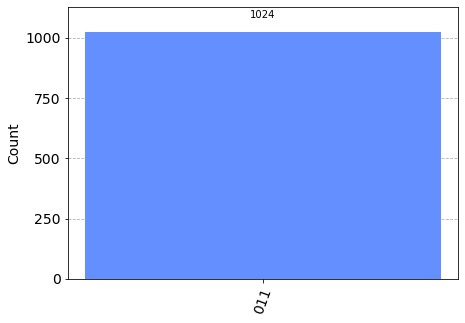

In [37]:
n = 3
s = '011'
circ = QuantumCircuit(n+1, n)
circ.h(n)
circ.z(n)
for i in range(n):
    circ.h(i)
circ.barrier()
s = s[::-1]
for q in range(n):
    if s[q] == '0':
        circ.i(q)
    else:
        circ.cx(q, n)
circ.barrier()
for i in range(n):
    circ.h(i)
for i in range(n):
    circ.measure(i, i)


aer_sim = Aer.get_backend('aer_simulator')
shots = 1024
qobj = assemble(circ)
results = aer_sim.run(qobj).result()
answer = results.get_counts()
plot_histogram(answer)

<a id="transpiling_exercise"></a>
# 2.4 - Transpiling (4 pts. total)

In order to transform a circuit from its theoretical form to something applicable on a specific, real-world quantum computer we need to **transpile** it. Thereby we take into account:
<ul>
    <li>the gates available on the computer we want to consider;</li>
    <li>the <it>topology</it> of the computer, i.e. which qubits can interact with which.</li>
</ul>
In general, transpiling a quantum circuit is not simple at all, and it is usually left to automatic calculators. In this exercise, we will mimick the transpiling procedure, to exploit some interesting relations among quantum gates.

## 2.4.a Change of basis gates (1 pt.)
In the following cell, a simple quantum circuit, involving four qubits, is defined in terms of <code>CNOT</code> gates and <code>H</code> gates. Rewrite the circuit in terms of <code>CZ</code> and <code>H</code> gates. 

<b>Note.</b> This part of the exercise should be perfomed manually, and carefully justified step by step.

In [38]:
circuit = qiskit.QuantumCircuit(4)
circuit.cx(1,2)
circuit.cx(0,1)
circuit.h(2)
circuit.cx(0,3)

circuit.draw()

q_0: ───────■────■──
          ┌─┴─┐  │  
q_1: ──■──┤ X ├──┼──
     ┌─┴─┐├───┤  │  
q_2: ┤ X ├┤ H ├──┼──
     └───┘└───┘┌─┴─┐
q_3: ──────────┤ X ├
               └───┘

In [39]:
#creation of a circuit with the same number of qubits (4)
r_circuit = qiskit.QuantumCircuit(4)
#we know that Z = HXH (gate identities) so we gonna replace Z with HXH
r_circuit.cz(1,2) #Replace cx gate for cz gate
#H gate to rotate qubits.
r_circuit.h(2)
r_circuit.h(2)
#the gate going from q0 to q2 can be replaced by a CZ gate from q0 to q1 and with a hadamard from q2 ...
#... under the premise that the H gate rotates q2
r_circuit.h(1)
#replace CX for CZ
r_circuit.cz(0,1)
#H gate to rotate qubits.
r_circuit.h(1)
r_circuit.h(2)
#replace CX for CZ
r_circuit.cz(0,3)
r_circuit.h(3) #last H gate to flip q3
r_circuit.draw()



q_0: ──────────■────────■──────
        ┌───┐  │  ┌───┐ │      
q_1: ─■─┤ H ├──■──┤ H ├─┼──────
      │ ├───┤┌───┐├───┤ │      
q_2: ─■─┤ H ├┤ H ├┤ H ├─┼──────
        └───┘└───┘└───┘ │ ┌───┐
q_3: ───────────────────■─┤ H ├
                          └───┘

In [40]:
r_circuit = qiskit.QuantumCircuit(4,4)
r_circuit.cz(1,2) 
r_circuit.h(2)
r_circuit.h(2)
r_circuit.h(1)
r_circuit.cz(0,1)
r_circuit.h(1)
r_circuit.h(2)
r_circuit.cz(0,3)
r_circuit.h(3) 
for i in range(4):
    r_circuit.measure(i,i)

r_circuit.draw()


┌─┐         
q_0: ──────────■────────■──────┤M├─────────
        ┌───┐  │  ┌───┐ │      └╥┘┌─┐      
q_1: ─■─┤ H ├──■──┤ H ├─┼───────╫─┤M├──────
      │ ├───┤┌───┐├───┤ │       ║ └╥┘┌─┐   
q_2: ─■─┤ H ├┤ H ├┤ H ├─┼───────╫──╫─┤M├───
        └───┘└───┘└───┘ │ ┌───┐ ║  ║ └╥┘┌─┐
q_3: ───────────────────■─┤ H ├─╫──╫──╫─┤M├
                          └───┘ ║  ║  ║ └╥┘
c: 4/═══════════════════════════╩══╩══╩══╩═
                                0  1  2  3

## 2.4.b Verification of the new circuit (1 pt.)
Now, code and plot the circuit you obtained in Qiskit. Insert measurement operations in both the "old" and the "new" circuit, and show that they give equivalent outcomes.

#### Measurements

In [41]:
#previous circuit
r_circuit = qiskit.QuantumCircuit(4,4)
r_circuit.cz(1,2)
r_circuit.h(2)
r_circuit.h(2)
r_circuit.h(1)
r_circuit.cz(0,1)
r_circuit.h(1)
r_circuit.h(2)
r_circuit.cz(0,3)
r_circuit.h(3) 
#Measurement
for i in range(4):
    r_circuit.measure(i,i)
r_circuit.draw()


┌─┐         
q_0: ──────────■────────■──────┤M├─────────
        ┌───┐  │  ┌───┐ │      └╥┘┌─┐      
q_1: ─■─┤ H ├──■──┤ H ├─┼───────╫─┤M├──────
      │ ├───┤┌───┐├───┤ │       ║ └╥┘┌─┐   
q_2: ─■─┤ H ├┤ H ├┤ H ├─┼───────╫──╫─┤M├───
        └───┘└───┘└───┘ │ ┌───┐ ║  ║ └╥┘┌─┐
q_3: ───────────────────■─┤ H ├─╫──╫──╫─┤M├
                          └───┘ ║  ║  ║ └╥┘
c: 4/═══════════════════════════╩══╩══╩══╩═
                                0  1  2  3

#### Plot the old circuit

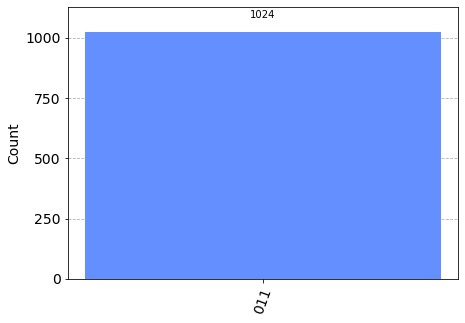

In [42]:
#To plot the circuit we're gonna use a histogram and aer_simulator from qiskit library.
aer_sim = Aer.get_backend('aer_simulator')
counts = 100
assem = assemble(circuit) 
outcome = aer_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)



#### Plot new circuit


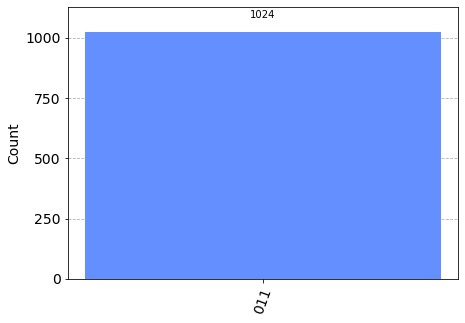

In [43]:
aer_sim = Aer.get_backend('aer_simulator')
counts = 100
assem = assemble(r_circuit) 
outcome = aer_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)

## 2.4.c Topology/1 (1 pt.)
In the following cell, the basis gates and the adjacency matrix for the IBM quantum computer Nairobi are shown. Using the automatic methods provided by Qiskit, transpile the circuit defined in the previous exercise, in order to make it executable with the available gates and topology. See <a href="https://qiskit.org/documentation/stubs/qiskit.compiler.transpile.html">here</a> for some documentation about the automatic transpiling function. Plot the resulting circuit.

In [44]:
basis_gates = ["cx", "id", "rz", "sx", "x"]
adjacency_matrix = [[0,1],[1,0],[1,2],[2,1],[1,3],[3,1],[3,5],[5,3],[4,5],[5,4],[5,6],[6,5]]

#qiskit.compiler.transpile from qiskit libraries:

transpile_circuit = transpile(circuit, backend=None, basis_gates=basis_gates, inst_map=None, 
                        coupling_map=adjacency_matrix, backend_properties=None, initial_layout=None, 
                        layout_method=None, routing_method=None, translation_method=None, scheduling_method=None, 
                        instruction_durations=None, dt=None, approximation_degree=None, timing_constraints=None, 
                        seed_transpiler=None, optimization_level=None,  callback=None, 
                        output_name=None, unitary_synthesis_method='default', 
                        unitary_synthesis_plugin_config=None, target=None)

transpile_circuit.draw()


global phase: π/4
                                                     
ancilla_0 -> 0 ──────────────────────────────────────
                            ┌───┐                    
      q_3 -> 1 ─────────────┤ X ├────────────────────
                            └─┬─┘                    
ancilla_1 -> 2 ───────────────┼──────────────────────
                              │                      
      q_0 -> 3 ───────■───────■──────────────────────
               ┌───┐  │  ┌─────────┐┌────┐┌─────────┐
      q_2 -> 4 ┤ X ├──┼──┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├
               └─┬─┘┌─┴─┐└─────────┘└────┘└─────────┘
      q_1 -> 5 ──■──┤ X ├────────────────────────────
                    └───┘                            
ancilla_2 -> 6 ──────────────────────────────────────

## 2.4.d Topology/2 (1 pt.)
Using your IBMq account, you have direct and automatic access to the datasheet of all the freely available IBM quantum computers. Exploting the <code>backend</code> argument of the <code>transpile</code> function (or directly IBMq website), transpile the circuit in such a way that it is executable on the backend <code>ibmq_montreal</code>. Draw the corresponding circuit. By looking at the topology and the available gates on <code>ibmq_montreal</code>, comment on analogies and differences from the circuit obtained in the previous exercise.

In [45]:

circuit = qiskit.QuantumCircuit(4)
circuit.cx(1,2)
circuit.cx(0,1)
circuit.h(2)
circuit.cx(0,3)

circuit.draw()


basis_gates = ["cx", "id", "rz", "sx", "x"]
adjacency_matrix = [[0,1],[1,0],[1,2],[2,1],[1,3],[3,1],[3,5],[5,3],[4,5],[5,4],[5,6],[6,5]]

#qiskit.compiler.transpile from qiskit libraries:

transpile_circuit = transpile(circuit, backend=None, basis_gates=basis_gates, inst_map=None, 
                        coupling_map=adjacency_matrix, backend_properties=None, initial_layout=None, 
                        layout_method=None, routing_method=None, translation_method=None, scheduling_method=None, 
                        instruction_durations=None, dt=None, approximation_degree=None, timing_constraints=None, 
                        seed_transpiler=None, optimization_level=None,  callback=None, 
                        output_name=None, unitary_synthesis_method='default', 
                        unitary_synthesis_plugin_config=None, target=None)

transpile_circuit.draw()


from qiskit.providers.fake_provider import FakeMontreal
backend=FakeMontreal()

circ = transpile(transpile_circuit, backend, basis_gates=None, inst_map=None, coupling_map=None, 
                        backend_properties=None, initial_layout=None, layout_method=None, routing_method=None, 
                        translation_method=None, scheduling_method=None, instruction_durations=None, dt=None, 
                        approximation_degree=None, timing_constraints=None, seed_transpiler=None,
                        optimization_level=None,  callback=None, output_name=None, 
                        unitary_synthesis_method='default', unitary_synthesis_plugin_config=None, target=None)


circ.draw()




global phase: π/4
                                                  
        q_0 -> 0 ─────────────────────────────────
                                                  
        q_2 -> 1 ─────────────────────────────────
                                                  
        q_4 -> 2 ─────────────────────────────────
                                                  
  ancilla_0 -> 3 ─────────────────────────────────
                                                  
  ancilla_1 -> 4 ─────────────────────────────────
                                 ┌───┐            
        q_1 -> 5 ────────────────┤ X ├────────────
                                 └─┬─┘            
  ancilla_2 -> 6 ──────────────────┼──────────────
                                   │              
  ancilla_3 -> 7 ──────────────────┼──────────────
                                   │              
        q_3 -> 8 ──────────■───────■──────────────
                           │                      
  ancilla_4 -> 9 ──────────┼──────────────────────
                           │                      
 ancilla_5 -> 10 ──────────┼──────────────────────
                         ┌─┴─┐                    
       q_5 -> 11 ──■─────┤ X ├────────────────────
                   │     └───┘                    
 ancilla_6 -> 12 ──┼──────────────────────────────
                   │                              
 ancilla_7 -> 13 ──┼──────────────────────────────
                 ┌─┴─┐┌─────────┐┌────┐┌─────────┐
       q_6 -> 14 ┤ X ├┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├
                 └───┘└─────────┘└────┘└─────────┘
 ancilla_8 -> 15 ─────────────────────────────────
                                                  
 ancilla_9 -> 16 ─────────────────────────────────
                                                  
ancilla_10 -> 17 ─────────────────────────────────
                                                  
ancilla_11 -> 18 ─────────────────────────────────
                                                  
ancilla_12 -> 19 ─────────────────────────────────
                                                  
ancilla_13 -> 20 ─────────────────────────────────
                                                  
ancilla_14 -> 21 ─────────────────────────────────
                                                  
ancilla_15 -> 22 ─────────────────────────────────
                                                  
ancilla_16 -> 23 ─────────────────────────────────
                                                  
ancilla_17 -> 24 ─────────────────────────────────
                                                  
ancilla_18 -> 25 ─────────────────────────────────
                                                  
ancilla_19 -> 26 ─────────────────────────────────

# 2.5 Measuring an operator (3 pts.)
Let $\mathcal{U}$ be a single qubit operator, which is both Hermitian and unitary. That is, $\mathcal{U}$ can be seen both as an observable and as a quantum gate. 
<ol>
    <li>Prove that the only possible eigenvalues of $\mathcal{U}$ are $\pm 1$.
    <li>Suppose in particular that $\mathcal{U}$ has exactly one eigenvalue equal to $1$ and exactly one eigenvalue equal to $-1$. Consider the circuit drawn in figure below and prove that, for any input state $\ket{\psi_{in}}$, it "measures" $\mathcal{U}$, i.e.:
        <ul>
            <li>the output state $\ket{\psi_{out}}$ is an eigenstate of $\mathcal{U}$;</li>
            <li>the outcome of the measurement (on the computational basis) on the first qubit can be bijectively mapped onto the eigenvalue corresponding to the eigenstate $\ket{\psi_{out}}$</li>
        </ul>
 </ol>
 
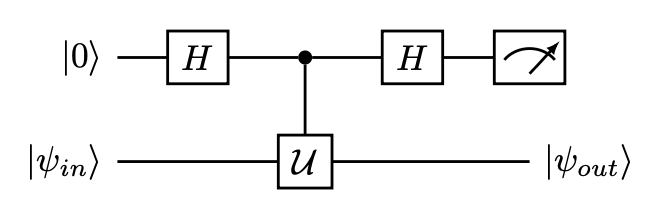

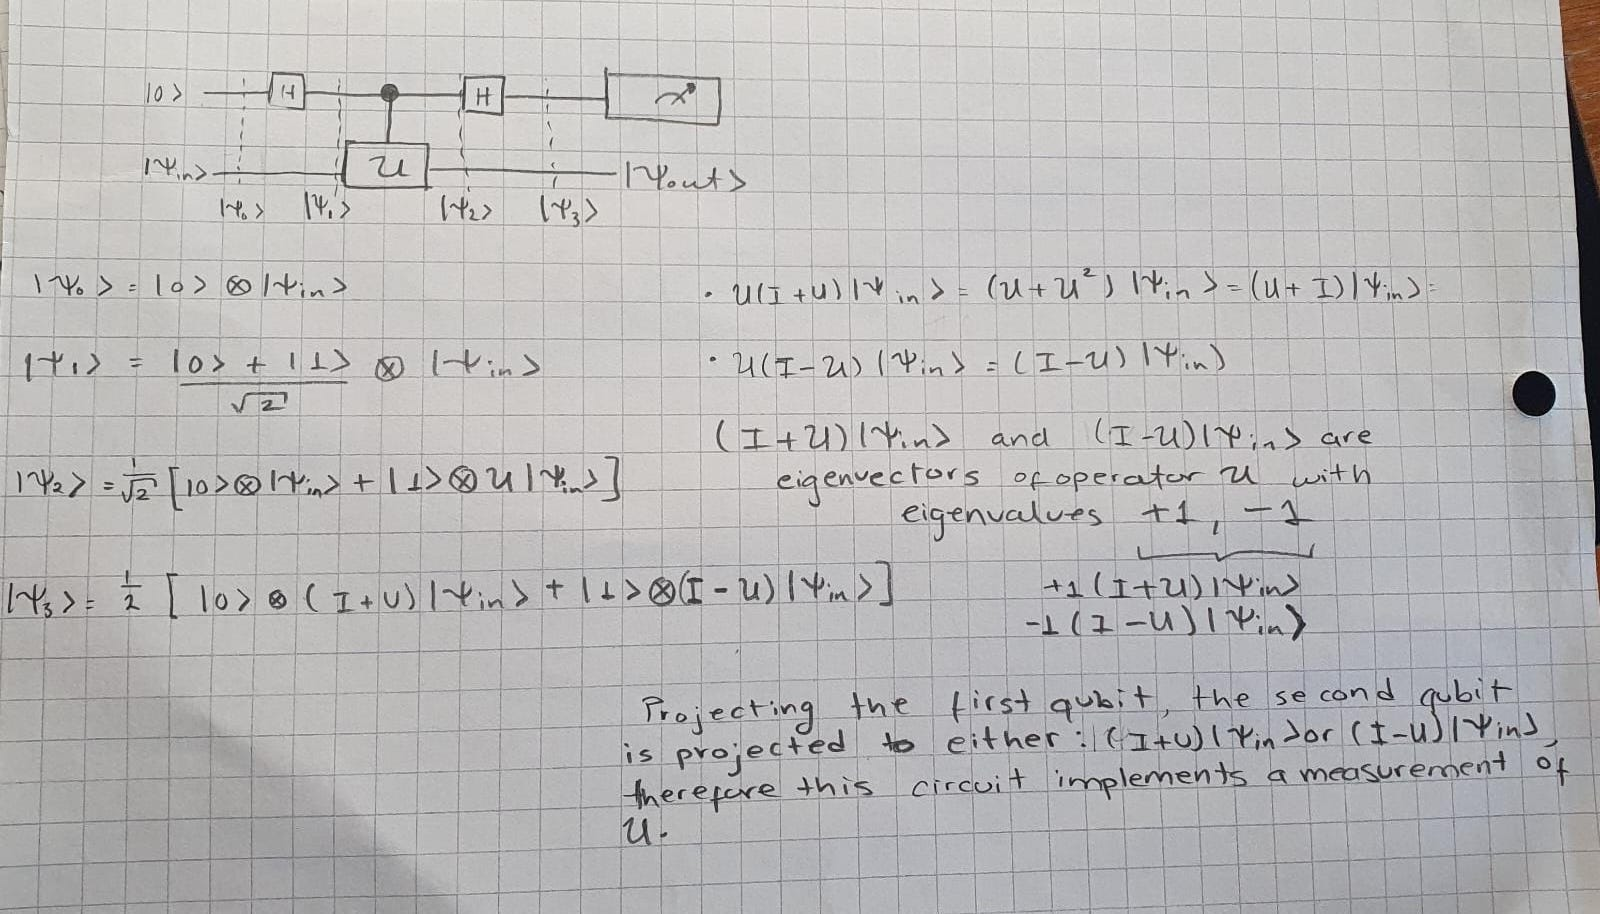